# Zadanie č.1


### 1.  Čistenie a úprava dát


#### 1.1 Načítanie dát

In [905]:
import numpy as np
import pandas

data_path = '/Users/adam.samko/Documents/SUNS/zadania/z1/data/'

train_data_path = data_path + 'train.csv'
test_data_path = data_path + 'test.csv'

parsed_train_data = pandas.read_csv(train_data_path, low_memory=False)
parsed_test_data = pandas.read_csv(test_data_path)

trained_df = pandas.DataFrame(parsed_train_data)
test_df = pandas.DataFrame(parsed_test_data)

In [906]:
trained_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62869 entries, 0 to 62868
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   D_appid                 62869 non-null  int64  
 1   D_name                  62773 non-null  object 
 2   positive                62869 non-null  int64  
 3   negative                62869 non-null  int64  
 4   score                   47427 non-null  float64
 5   D_reviews               62869 non-null  object 
 6   D_owners                62869 non-null  object 
 7   coming_soon             62816 non-null  object 
 8   D_release_date          52323 non-null  object 
 9   D_genre                 55624 non-null  object 
 10  VYMAZAT_price           55809 non-null  float64
 11  is_free                 62869 non-null  bool   
 12  ccu                     62869 non-null  int64  
 13  english                 55783 non-null  object 
 14  languages               55783 non-null

In [907]:
test_df.dtypes == trained_df.dtypes

D_appid                    True
D_name                     True
positive                   True
negative                   True
score                      True
D_reviews                  True
D_owners                   True
coming_soon               False
D_release_date             True
D_genre                    True
VYMAZAT_price              True
is_free                    True
ccu                        True
english                   False
languages                  True
D_tags                     True
D_developer                True
D_publisher                True
publisher_est              True
developer_est              True
self_published             True
has_dlc                    True
has_website_linked         True
has_controller_support     True
is_single_player          False
is_multi_player           False
is_early_access            True
mature_content             True
Addictive                  True
Beautiful                  True
Classic                    True
Competit

#### 1.2 Uprava stlpcov D_... a V_... zo zadania

#### D_appid
D_appid ma hodnoty uz v ciselnom tvare. Taktiez ide o identifikator a preto ho vymazeme z datasetu.

In [908]:
if 'D_appid' in trained_df.columns:
    trained_df = trained_df.drop('D_appid', axis=1)
if 'D_appid' in test_df.columns:
    test_df = test_df.drop('D_appid', axis=1)

#### D_name
D_name je taktiez identifikator ktory neprispieva ziadnou hodnotnou informaciou pre siet. Preto ho vymazeme.

In [909]:
if 'D_name' in trained_df.columns:
    trained_df = trained_df.drop('D_name', axis=1)
if 'D_name' in test_df.columns:
    test_df = test_df.drop('D_name', axis=1)

#### D_reviews
TODO: dopisat text

In [910]:
trained_df['D_reviews'].value_counts()

Negative                   17222
Positive                   13693
Mixed                      12170
Very Positive               9287
Mostly Positive             7046
Mostly Negative             2604
Overwhelmingly positive      783
Very Negative                 55
Overwhelmingly Negative        9
Name: D_reviews, dtype: int64

<AxesSubplot:ylabel='D_reviews'>

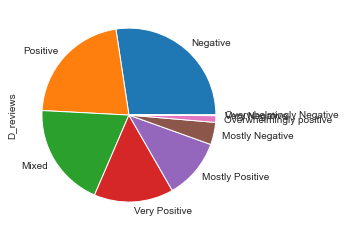

In [911]:
trained_df['D_reviews'].value_counts().plot(kind='pie')

-- Rozhodol som sa zlucit menej pocetne kategorie a vytvorit 3 vacsie - Positive, Negative a Mixed

In [912]:
trained_df.loc[trained_df['D_reviews'].str.contains('egative'), 'D_reviews'] = 'Negative'
trained_df.loc[trained_df['D_reviews'].str.contains('ositive'), 'D_reviews'] = 'Positive'

In [913]:
test_df.loc[test_df['D_reviews'].str.contains('egative'), 'D_reviews'] = 'Negative'
test_df.loc[test_df['D_reviews'].str.contains('ositive'), 'D_reviews'] = 'Positive'

In [914]:
test_df['D_reviews'].value_counts()

Positive    641
Mixed       285
Negative     74
Name: D_reviews, dtype: int64

<AxesSubplot:ylabel='D_reviews'>

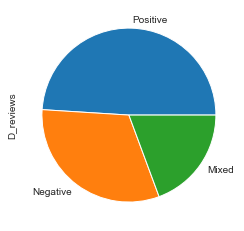

In [915]:
trained_df['D_reviews'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='D_reviews'>

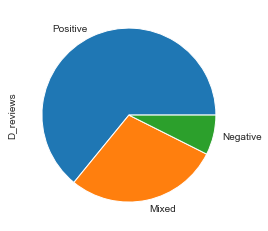

In [916]:
test_df['D_reviews'].value_counts().plot(kind='pie')

-- Pre ziskanie cislenych hodnot som sa rozhodol pouzit Ordinal encoding v poradi Negative, Mixed a Positive, kedze tieto hodnoty maju urcitu postupnost (od najhorsieho po najlepsie)

In [917]:
from sklearn import preprocessing
le = preprocessing.OrdinalEncoder(categories=[['Negative',
                                               'Mixed',
                                               'Positive']])
trained_df['D_reviews'] = (le.fit_transform(trained_df['D_reviews'].values.reshape(-1, 1)))
test_df['D_reviews'] = (le.transform(test_df['D_reviews'].values.reshape(-1, 1)))

<AxesSubplot:ylabel='D_reviews'>

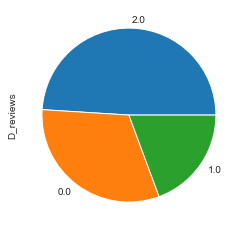

In [918]:
trained_df['D_reviews'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='D_reviews'>

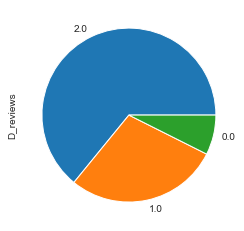

In [919]:
test_df['D_reviews'].value_counts().plot(kind='pie')

In [920]:
trained_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62869 entries, 0 to 62868
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   positive                62869 non-null  int64  
 1   negative                62869 non-null  int64  
 2   score                   47427 non-null  float64
 3   D_reviews               62869 non-null  float64
 4   D_owners                62869 non-null  object 
 5   coming_soon             62816 non-null  object 
 6   D_release_date          52323 non-null  object 
 7   D_genre                 55624 non-null  object 
 8   VYMAZAT_price           55809 non-null  float64
 9   is_free                 62869 non-null  bool   
 10  ccu                     62869 non-null  int64  
 11  english                 55783 non-null  object 
 12  languages               55783 non-null  float64
 13  D_tags                  62869 non-null  object 
 14  D_developer             55676 non-null

In [921]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   positive                1000 non-null   int64  
 1   negative                1000 non-null   int64  
 2   score                   1000 non-null   float64
 3   D_reviews               1000 non-null   float64
 4   D_owners                1000 non-null   object 
 5   coming_soon             1000 non-null   bool   
 6   D_release_date          1000 non-null   object 
 7   D_genre                 1000 non-null   object 
 8   VYMAZAT_price           1000 non-null   float64
 9   is_free                 1000 non-null   bool   
 10  ccu                     1000 non-null   int64  
 11  english                 1000 non-null   bool   
 12  languages               1000 non-null   float64
 13  D_tags                  1000 non-null   object 
 14  D_developer             1000 non-null   o

#### D_owners
#### TODO: Mozno skresat rozmer

In [922]:
trained_df['D_owners'].value_counts()

0 .. 20,000                  48315
20,000 .. 50,000              6048
50,000 .. 100,000             2940
100,000 .. 200,000            2099
200,000 .. 500,000            1801
500,000 .. 1,000,000           812
1,000,000 .. 2,000,000         444
2,000,000 .. 5,000,000         279
5,000,000 .. 10,000,000         75
10,000,000 .. 20,000,000        37
20,000,000 .. 50,000,000        16
50,000,000 .. 100,000,000        3
Name: D_owners, dtype: int64

<AxesSubplot:ylabel='D_owners'>

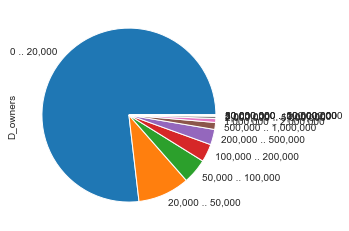

In [923]:
trained_df['D_owners'].value_counts().plot(kind='pie')

In [924]:
test_df['D_owners'].value_counts()

0 .. 20,000                   602
20,000 .. 50,000              153
50,000 .. 100,000              77
200,000 .. 500,000             67
100,000 .. 200,000             52
500,000 .. 1,000,000           23
1,000,000 .. 2,000,000         12
2,000,000 .. 5,000,000         10
10,000,000 .. 20,000,000        1
100,000,000 .. 200,000,000      1
50,000,000 .. 100,000,000       1
5,000,000 .. 10,000,000         1
Name: D_owners, dtype: int64

-- Na konverziu hodnot na ciselne pouzijem orezanie stringu a necham len koncovu hodnotu intervalu a nasledne prekonvertujem na integer

In [925]:
trained_df = trained_df.assign(D_owners=trained_df['D_owners'].str.split(' .. ').str[1].str.replace(',','').astype(int))

trained_df['D_owners'].value_counts()


20000        48315
50000         6048
100000        2940
200000        2099
500000        1801
1000000        812
2000000        444
5000000        279
10000000        75
20000000        37
50000000        16
100000000        3
Name: D_owners, dtype: int64

In [926]:
test_df = test_df.assign(D_owners=test_df['D_owners'].str.split(' .. ').str[1].str.replace(',','').astype(int))

test_df['D_owners'].value_counts()

20000        602
50000        153
100000        77
500000        67
200000        52
1000000       23
2000000       12
5000000       10
20000000       1
200000000      1
100000000      1
10000000       1
Name: D_owners, dtype: int64

#### D_release_date
-- To iste ako pre D_owners

In [927]:
trained_df = trained_df.assign(D_release_date=trained_df['D_release_date'].str.split(' ').str[-1])
trained_df['D_release_date'].value_counts()

2021    11551
2020     9157
2018     7396
2019     7276
2017     5772
2016     4037
2015     2470
2014     1512
2022     1212
2013      443
2012      325
2009      312
2010      275
2011      258
2008      142
2007       97
2006       62
2005        6
2004        5
1999        3
2001        3
2003        3
1997        2
2000        2
1998        1
2002        1
Name: D_release_date, dtype: int64

In [928]:
test_df = test_df.assign(D_release_date=test_df['D_release_date'].str.split(' ').str[-1])
test_df['D_release_date'].value_counts()


2020    216
2018    175
2021    157
2019    151
2017    110
2016     79
2015     43
2014     28
2013      9
2022      6
2012      6
2010      5
2009      4
2008      4
2011      3
2007      1
2001      1
2004      1
2006      1
Name: D_release_date, dtype: int64

#### D_genre
-- Pretransformujeme na pole stringov

In [929]:
trained_df['D_genre'] = pandas.Series(trained_df['D_genre'].str.replace(" ","")).str.split(',')
test_df['D_genre'] = pandas.Series(test_df['D_genre'].str.replace(" ","")).str.split(',')

Zdroj: https://stackoverflow.com/questions/52498640/multilabel-binarizer-float-object-not-iterable

In [930]:
mlb = preprocessing.MultiLabelBinarizer()
mask = trained_df['D_genre'].notnull()
# mlb.fit_transform(trained_df.loc[trained_df['D_genre'].notnull(), 'D_genre'].dropna())
arr = mlb.fit_transform(trained_df.loc[mask, 'D_genre'].dropna())
df = pandas.DataFrame(arr, index=trained_df.index[mask], columns=mlb.classes_).reindex(trained_df.index, fill_value=0)
df

,360V,Accounting,Action,ActionGames,Adventure,Animation&Modeling,AudioProduction,Casual,Design&Illustration,Documentary,...,Short,Simulation,SoftwareTraining,Sports,Strategy,Tutorial,Utilities,VideoProduction,Violent,WebPublishing
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [931]:
mask_test = test_df['D_genre'].notnull()
arr_test = mlb.transform(test_df.loc[mask_test, 'D_genre'].dropna())
df_test = pandas.DataFrame(arr_test, index=test_df.index[mask_test], columns=mlb.classes_).reindex(test_df.index, fill_value=0)
df_test

,360V,Accounting,Action,ActionGames,Adventure,Animation&Modeling,AudioProduction,Casual,Design&Illustration,Documentary,...,Short,Simulation,SoftwareTraining,Sports,Strategy,Tutorial,Utilities,VideoProduction,Violent,WebPublishing
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
997,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


-- concatnutie vytvoreneho dataframe-u so zanrami do rodicovskeho datasetu a dropnutie D_genre, kedze je uz zbytocny.
Zdroj: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [932]:
trained_df = pandas.concat([trained_df, df], axis=1).reindex(trained_df.index)
trained_df = trained_df.drop('D_genre', axis=1)

In [933]:
test_df = pandas.concat([test_df, df_test], axis=1).reindex(test_df.index)
test_df = test_df.drop('D_genre', axis=1)


In [934]:
trained_df

,positive,negative,score,D_reviews,D_owners,coming_soon,D_release_date,VYMAZAT_price,is_free,ccu,...,Short,Simulation,SoftwareTraining,Sports,Strategy,Tutorial,Utilities,VideoProduction,Violent,WebPublishing
0,193046,4940,0.975049,2.0,20000000,False,2000,999.0,False,16360,...,0,0,0,0,0,0,0,0,0,0
1,5412,895,0.858094,2.0,10000000,False,1999,499.0,False,87,...,0,0,0,0,0,0,0,0,0,0
2,5003,556,0.899982,2.0,10000000,False,2003,499.0,False,122,...,0,0,0,0,0,0,0,0,0,0
3,1852,412,0.818021,2.0,10000000,False,2001,499.0,False,7,...,0,0,0,0,0,0,0,0,0,0
4,13262,662,0.952456,2.0,10000000,False,1999,499.0,False,122,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62864,0,0,NaN,0.0,20000,True,NaN,NaN,False,0,...,0,0,0,0,0,0,0,0,0,0
62865,0,0,NaN,0.0,20000,True,NaN,NaN,False,0,...,0,0,0,0,0,0,0,0,0,0
62866,0,0,NaN,0.0,20000,True,NaN,NaN,False,0,...,0,0,0,0,0,0,0,0,0,0
62867,0,0,NaN,0.0,20000,True,NaN,NaN,False,0,...,0,0,0,0,0,0,0,0,0,0


In [935]:
trained_df

,positive,negative,score,D_reviews,D_owners,coming_soon,D_release_date,VYMAZAT_price,is_free,ccu,...,Short,Simulation,SoftwareTraining,Sports,Strategy,Tutorial,Utilities,VideoProduction,Violent,WebPublishing
0,193046,4940,0.975049,2.0,20000000,False,2000,999.0,False,16360,...,0,0,0,0,0,0,0,0,0,0
1,5412,895,0.858094,2.0,10000000,False,1999,499.0,False,87,...,0,0,0,0,0,0,0,0,0,0
2,5003,556,0.899982,2.0,10000000,False,2003,499.0,False,122,...,0,0,0,0,0,0,0,0,0,0
3,1852,412,0.818021,2.0,10000000,False,2001,499.0,False,7,...,0,0,0,0,0,0,0,0,0,0
4,13262,662,0.952456,2.0,10000000,False,1999,499.0,False,122,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62864,0,0,NaN,0.0,20000,True,NaN,NaN,False,0,...,0,0,0,0,0,0,0,0,0,0
62865,0,0,NaN,0.0,20000,True,NaN,NaN,False,0,...,0,0,0,0,0,0,0,0,0,0
62866,0,0,NaN,0.0,20000,True,NaN,NaN,False,0,...,0,0,0,0,0,0,0,0,0,0
62867,0,0,NaN,0.0,20000,True,NaN,NaN,False,0,...,0,0,0,0,0,0,0,0,0,0


In [936]:
# res = pandas.DataFrame(mlb.fit_transform(),
#                    columns=mlb.classes_,
#                    index=trained_df['D_genre'].index)

#### D_developer a D_publisher
-- Rozhodol som sa tieto data nepouzit a rovno ich vymazat kvoli zlozitemu spracovaniu a narocnosti

In [937]:
trained_df = trained_df.drop('D_developer', axis=1)
test_df = test_df.drop('D_developer', axis=1)

trained_df = trained_df.drop('D_publisher', axis=1)
test_df = test_df.drop('D_publisher', axis=1)


In [938]:
# le = preprocessing.OrdinalEncoder(handle_unknown=)
# trained_df['D_developer'] = le.fit_transform(trained_df['D_developer'])
# trained_df['D_developer'].value_counts()

In [939]:
# test_df['D_developer'] = le.transform(test_df['D_developer'])
# test_df['D_developer'].value_counts()

Funkcia na pridanie neexistujucich hodnot do kodovania - zdroj: https://stephenallwright.com/label-encode-unseen-values/

In [940]:
# def label_encode_columns(df, columns, encoders):
#     for col in columns:
#         le = encoders.get(col)
#         df[col] = [x if x in le.classes_ else 'Unseen' for x in df[col]]
#         df[col] = le.transform(df[[col]])
#
#     return df, encoders

#### D_tags

In [941]:
trained_df['D_tags'][0]

'{\'Action\': 5379, \'FPS\': 4801, \'Multiplayer\': 3362, \'Shooter\': 3327, \'Classic\': 2758, \'Team-Based\': 1844, \'First-Person\': 1692, \'Competitive\': 1588, \'Tactical\': 1323, "1990\'s": 1181, \'e-sports\': 1173, \'PvP\': 865, \'Old School\': 751, \'Military\': 623, \'Strategy\': 604, \'Survival\': 296, \'Score Attack\': 285, \'1980s\': 256, \'Assassin\': 223, \'Violent\': 65}'

-- vytiahnem zo stringu iba nazvy tagov a vlozim ich do pola stringov

In [942]:
trained_df['D_tags'] = trained_df['D_tags'].str.replace("\'", "").replace("\"", "").str.strip(' {}').str.split(',')
trained_df['D_tags'] = pandas.Series([[item.split(":")[0].replace("\"", "").replace(' ', '') for item in lo] for lo in trained_df['D_tags']])

# to iste pre test data
test_df['D_tags'] = test_df['D_tags'].str.replace("\'", "").replace("\"", "").str.strip(' {}').str.split(',')
test_df['D_tags'] = pandas.Series([[item.split(":")[0].replace("\"", "").replace(' ', '') for item in lo] for lo in test_df['D_tags']])

In [943]:
trained_df['D_tags'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 62869 entries, 0 to 62868
Series name: D_tags
Non-Null Count  Dtype 
--------------  ----- 
62869 non-null  object
dtypes: object(1)
memory usage: 491.3+ KB


In [944]:
test_df['D_tags'].info

<bound method Series.info of 0      [FreetoPlay, Racing, Indie, Casual, Sports, Mu...
1      [Shooter, ShootEmUp, TwinStickShooter, 3D, Dar...
2      [FreetoPlay, Strategy, Action, Multiplayer, In...
3      [TimeManagement, LifeSim, Trading, Simulation,...
4                                [Casual, Indie, Puzzle]
                             ...                        
995                                 [Casual, Simulation]
996                                    [Strategy, Chess]
997    [Spectaclefighter, Souls-like, Third-PersonSho...
998    [Point&Click, Puzzle, Exploration, Adventure, ...
999                                      [Action, Indie]
Name: D_tags, Length: 1000, dtype: object>

-- kodovanie pouzijem rovnake ako pri d_genre - MultiLabelEncoder

In [945]:
mlb = preprocessing.MultiLabelBinarizer()
mask = trained_df['D_tags'].notnull()
arr = mlb.fit_transform(trained_df.loc[mask, 'D_tags'].dropna())
mlb.classes_

array(['1980s', '1990s', '2.5D', '2D', '2DFighter', '2DPlatformer',
       '360Video', '3D', '3DFighter', '3DPlatformer', '3DVision',
       '4PlayerLocal', '4X', '6DOF', '8-bitMusic', 'ATV', 'Abstract',
       'Action', 'Action-Adventure', 'ActionRPG', 'ActionRTS',
       'ActionRoguelike', 'Addictive', 'Adventure', 'Agriculture',
       'Aliens', 'AlternateHistory', 'Ambient', 'America',
       'Animation&Modeling', 'Anime', 'Arcade', 'Archery', 'ArenaShooter',
       'ArtificialIntelligence', 'Assassin', 'AsymmetricVR',
       'AsynchronousMultiplayer', 'Atmospheric', 'AudioProduction',
       'AutoBattler', 'Automation', 'AutomobileSim', 'BMX',
       'Base-Building', 'Baseball', 'BasedOnANovel', 'Basketball',
       'BattleRoyale', 'Beatemup', 'Beautiful', 'Benchmark', 'Bikes',
       'Blood', 'BoardGame', 'BossRush', 'Bowling', 'Boxing', 'Building',
       'BulletHell', 'BulletTime', 'CRPG', 'Capitalism', 'CardBattler',
       'CardGame', 'Cartoon', 'Cartoony', 'Casual', 'Cats',


In [946]:
tags_df = pandas.DataFrame(arr, index=trained_df.index[mask], columns=mlb.classes_).reindex(trained_df.index, fill_value=0)
cols = tags_df.columns

- dropnem vsetky stlpce ktore maju vyskyt jednej unikatnej hodnoty vacsi ako 90%

In [947]:

# for c in cols:
(tags_df.apply(pandas.Series.value_counts, normalize=True).max() <= 0.9).sum()

13

In [948]:
tags_df = tags_df.loc[:, ~(tags_df.apply(pandas.Series.value_counts, normalize=True).max() > 0.9)]
tags_df

,2D,Action,Adventure,Atmospheric,Casual,EarlyAccess,Indie,Puzzle,RPG,Simulation,Singleplayer,Strategy,[]
0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62864,0,0,0,0,0,0,0,0,0,0,0,0,1
62865,0,0,0,0,0,0,0,0,0,0,0,0,1
62866,0,0,0,0,0,0,0,0,0,0,0,0,1
62867,0,0,0,0,0,0,0,0,0,0,0,0,1


In [949]:
trained_df = pandas.concat([trained_df, tags_df], axis=1).reindex(trained_df.index)
if 'D_tags' in trained_df:
    trained_df = trained_df.drop('D_tags', axis=1)
if '[]' in trained_df:
    trained_df = trained_df.drop('[]', axis=1)
trained_df

,positive,negative,score,D_reviews,D_owners,coming_soon,D_release_date,VYMAZAT_price,is_free,ccu,...,Adventure,Atmospheric,Casual,EarlyAccess,Indie,Puzzle,RPG,Simulation,Singleplayer,Strategy
0,193046,4940,0.975049,2.0,20000000,False,2000,999.0,False,16360,...,0,0,0,0,0,0,0,0,0,1
1,5412,895,0.858094,2.0,10000000,False,1999,499.0,False,87,...,0,0,0,0,0,0,0,0,0,0
2,5003,556,0.899982,2.0,10000000,False,2003,499.0,False,122,...,0,0,0,0,0,0,0,0,1,1
3,1852,412,0.818021,2.0,10000000,False,2001,499.0,False,7,...,0,0,0,0,0,0,0,0,0,0
4,13262,662,0.952456,2.0,10000000,False,1999,499.0,False,122,...,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62864,0,0,NaN,0.0,20000,True,NaN,NaN,False,0,...,0,0,0,0,0,0,0,0,0,0
62865,0,0,NaN,0.0,20000,True,NaN,NaN,False,0,...,0,0,0,0,0,0,0,0,0,0
62866,0,0,NaN,0.0,20000,True,NaN,NaN,False,0,...,0,0,0,0,0,0,0,0,0,0
62867,0,0,NaN,0.0,20000,True,NaN,NaN,False,0,...,0,0,0,0,0,0,0,0,0,0


-- to iste pre test data s tym ze pouzijeme encoding dictionary z train dat

In [950]:
mask_test = test_df['D_tags'].notnull()
arr_test = mlb.transform(test_df.loc[mask_test, 'D_tags'].dropna())
mlb.classes_

array(['1980s', '1990s', '2.5D', '2D', '2DFighter', '2DPlatformer',
       '360Video', '3D', '3DFighter', '3DPlatformer', '3DVision',
       '4PlayerLocal', '4X', '6DOF', '8-bitMusic', 'ATV', 'Abstract',
       'Action', 'Action-Adventure', 'ActionRPG', 'ActionRTS',
       'ActionRoguelike', 'Addictive', 'Adventure', 'Agriculture',
       'Aliens', 'AlternateHistory', 'Ambient', 'America',
       'Animation&Modeling', 'Anime', 'Arcade', 'Archery', 'ArenaShooter',
       'ArtificialIntelligence', 'Assassin', 'AsymmetricVR',
       'AsynchronousMultiplayer', 'Atmospheric', 'AudioProduction',
       'AutoBattler', 'Automation', 'AutomobileSim', 'BMX',
       'Base-Building', 'Baseball', 'BasedOnANovel', 'Basketball',
       'BattleRoyale', 'Beatemup', 'Beautiful', 'Benchmark', 'Bikes',
       'Blood', 'BoardGame', 'BossRush', 'Bowling', 'Boxing', 'Building',
       'BulletHell', 'BulletTime', 'CRPG', 'Capitalism', 'CardBattler',
       'CardGame', 'Cartoon', 'Cartoony', 'Casual', 'Cats',


In [951]:
tags_df_test = pandas.DataFrame(arr_test, index=test_df.index[mask_test], columns=mlb.classes_).reindex(test_df.index, fill_value=0)

- zahod vsetky stlpce, ktore nie su z ponechanych stlpcov z trenovacieho datasetu
- zdroj: https://stackoverflow.com/questions/56891518/drop-columns-from-pandas-dataframe-if-they-are-not-in-specific-list

In [952]:
tags_df_test = tags_df_test.drop(columns=[col for col in tags_df_test if col not in tags_df.columns])
tags_df_test

,2D,Action,Adventure,Atmospheric,Casual,EarlyAccess,Indie,Puzzle,RPG,Simulation,Singleplayer,Strategy,[]
0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,1,1,0,0
4,0,0,0,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,0,0,0,1,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,1,0
997,0,1,0,0,0,0,0,0,0,0,0,0,0
998,0,0,1,0,0,0,1,1,0,0,1,0,0


In [953]:
test_df = pandas.concat([test_df, tags_df_test], axis=1).reindex(test_df.index)
test_df = test_df.drop('D_tags', axis=1)
test_df = test_df.drop('[]', axis=1)

In [954]:
test_df

,positive,negative,score,D_reviews,D_owners,coming_soon,D_release_date,VYMAZAT_price,is_free,ccu,...,Adventure,Atmospheric,Casual,EarlyAccess,Indie,Puzzle,RPG,Simulation,Singleplayer,Strategy
0,13,19,0.406250,1.0,50000,False,2018,0.0,True,0,...,0,0,1,0,1,0,0,0,0,0
1,1,0,1.000000,2.0,20000,False,2021,0.0,True,0,...,0,0,0,0,0,0,0,0,1,0
2,304,111,0.732530,2.0,500000,False,2018,0.0,True,0,...,0,0,0,0,1,0,0,0,0,1
3,76,37,0.672566,1.0,50000,False,2020,0.0,True,2,...,0,0,0,0,1,0,0,1,1,0
4,1,0,1.000000,2.0,20000,False,2018,0.0,True,0,...,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,0.666667,1.0,20000,False,2018,99.0,False,0,...,0,0,1,0,0,0,0,1,0,0
996,8,4,0.666667,1.0,20000,False,2019,11999.0,False,0,...,0,0,0,0,0,0,0,0,0,1
997,4,3,0.571429,1.0,50000,False,2021,699.0,False,0,...,0,0,0,0,0,0,0,0,0,0
998,40,5,0.888889,2.0,20000,False,2021,2499.0,False,5,...,1,0,0,0,1,1,0,0,1,0


#### VYMAZAT_price
-- mazanie stlpca VYMAZAT_price

In [955]:
trained_df = trained_df.drop('VYMAZAT_price', axis=1)
test_df = test_df.drop('VYMAZAT_price', axis=1)


#### 1.3 Nahradanie null-values

In [956]:
trained_df.isnull().sum()
# trained_df.replace(['NO DATA','N/A', 0, ''],np.nan)

positive            0
negative            0
score           15442
D_reviews           0
D_owners            0
                ...  
Puzzle              0
RPG                 0
Simulation          0
Singleplayer        0
Strategy            0
Length: 81, dtype: int64

In [957]:
test_df.isnull().sum()


positive        0
negative        0
score           0
D_reviews       0
D_owners        0
               ..
Puzzle          0
RPG             0
Simulation      0
Singleplayer    0
Strategy        0
Length: 81, dtype: int64

##### coming_soon
-- nahradim za priemernu hodnotu

In [958]:
trained_df['coming_soon'] = trained_df['coming_soon'].replace(np.nan, False)
trained_df['coming_soon'].unique()


array([False,  True])

##### score
-- nahradzam nulove hodnoty priemerom hodnot zo stplca score

In [959]:
trained_df['score'] = trained_df['score'].fillna((trained_df['score'].mean()), inplace=False)
trained_df['score'].unique()


array([0.97504874, 0.85809418, 0.89998201, ..., 0.79370629, 0.82424242,
       0.96531792])

 ##### D_release_date
 -- nahradzam null hodnoty hodnotou zo susedneho riadku

In [960]:
trained_df['D_release_date'] = trained_df['D_release_date'].bfill()

-- zvysne riadky vymazem

In [961]:
trained_df = trained_df[trained_df['D_release_date'].notna()]
trained_df['D_release_date'].unique()

array(['2000', '1999', '2003', '2001', '1998', '2004', '2010', '2005',
       '2006', '2007', '2008', '2009', '2011', '2020', '2013', '2012',
       '2021', '2014', '2018', '2017', '2015', '2016', '2002', '2019',
       '1997', '2022'], dtype=object)

##### english
-- nulove hodnoty nahradim za True kedze, je to najcastejsia hodnota

In [962]:
trained_df['english'] = trained_df['english'].replace(np.nan, True)
trained_df['english'].unique()

array([ True, False])

##### languages, publisher_est a developer_est
Rozhodol som sa vymazat riadky s nulovou hodnotou v languages, publisher_est a developer_est

In [963]:
trained_df = trained_df[trained_df['languages'].notna()]
trained_df = trained_df[trained_df['publisher_est'].notna()]
trained_df = trained_df[trained_df['developer_est'].notna()]

##### is_single_player, is_multi_player
Taktiez som sa rozhodol vymazat riadky s null values v stlpcoch is_single_player a is_multi_player

In [964]:
trained_df = trained_df[trained_df['is_single_player'].notna()]
trained_df = trained_df[trained_df['is_multi_player'].notna()]

In [965]:
trained_df.isnull().sum()

positive        0
negative        0
score           0
D_reviews       0
D_owners        0
               ..
Puzzle          0
RPG             0
Simulation      0
Singleplayer    0
Strategy        0
Length: 81, dtype: int64

In [966]:
trained_df['is_single_player'].unique()

array([False, True], dtype=object)

In [967]:
test_df['is_single_player'].unique()


array([False,  True])

#### 1.4 Neobvyklé hodnoty

##### 1.4.1 Duplicitne stlpce
__ kedze po vytahovani zanrov a tagov mam duplicitne stlpce tak ich vymazem

In [968]:
trained_df = trained_df.loc[:,~trained_df.columns.duplicated()].copy()
test_df = test_df.loc[:,~test_df.columns.duplicated()].copy()
trained_df.columns == test_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

##### 1.4.2 Nezmyselne hodnoty
* Zobraz vsetky variacie nenumerickych hodnot a skontroluj nezmysly


In [969]:
str_var = trained_df.select_dtypes(exclude= 'number').columns.tolist()
for i, var in enumerate(str_var):
    x = trained_df[var].value_counts()
    print('-' * 40 + var + '-' * 40 )
    print(x)

----------------------------------------coming_soon----------------------------------------
False    50846
True      4643
Name: coming_soon, dtype: int64
----------------------------------------D_release_date----------------------------------------
2021    11560
2020    10839
2019     8099
2018     7900
2017     6015
2016     4111
2015     2486
2014     1507
2022     1051
2013      423
2012      318
2009      310
2010      286
2011      261
2008      140
2007       95
2006       62
2005        6
2004        5
1999        3
2001        3
2003        3
1997        2
2000        2
1998        1
2002        1
Name: D_release_date, dtype: int64
----------------------------------------is_free----------------------------------------
False    45839
True      9650
Name: is_free, dtype: int64
----------------------------------------english----------------------------------------
True     54935
False      554
Name: english, dtype: int64
----------------------------------------self_published------

-- neboli najdene ziadne neciselne nezmyselne hodnoty

* Hodnoty mimo rozsah (numericke)


In [970]:
trained_df.describe()


,positive,negative,score,D_reviews,D_owners,ccu,languages,publisher_est,developer_est,360V,...,Strategy,Tutorial,Utilities,VideoProduction,Violent,WebPublishing,2D,Atmospheric,Puzzle,Singleplayer
count,5.548900e+04,55489.000000,55489.000000,55489.000000,5.548900e+04,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,...,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000,55489.000000
mean,1.091665e+03,177.306854,0.738800,1.323199,1.508086e+05,94.210835,3.576817,16.043216,5.876029,0.000018,...,0.196832,0.000018,0.000180,0.000054,0.001496,0.000072,0.209645,0.137198,0.146858,0.395466
std,1.455342e+04,4177.187340,0.221308,0.823373,1.347607e+06,3277.982020,5.082403,43.207005,14.157514,0.004245,...,0.397608,0.004245,0.013423,0.007353,0.038647,0.008490,0.407059,0.344060,0.353967,0.488955
min,0.000000e+00,0.000000,0.000000,0.000000,2.000000e+04,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000e+00,0.000000,0.666667,1.000000,2.000000e+04,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.300000e+01,4.000000,0.747253,2.000000,2.000000e+04,0.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.700000e+01,24.000000,0.903122,2.000000,5.000000e+04,1.000000,4.000000,9.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.089871e+06,868546.000000,1.000000,2.000000,1.000000e+08,517487.000000,29.000000,404.000000,138.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


-- Vsetky numericke hodnoty su v ramci rozsahu, resp. su zmysluplne

* výskyt hodnôt v rozsahu s príliš malým množstvom záznamov


In [971]:
str_var = trained_df.columns.tolist()
for i, var in enumerate(str_var):
    x = trained_df[var].value_counts()
    print('-' * 40 + var + '-' * 40 )
    print(x)

----------------------------------------positive----------------------------------------
0        9726
1        3074
2        2491
3        2088
4        1810
         ... 
51590       1
1938        1
1221        1
6430        1
24470       1
Name: positive, Length: 4089, dtype: int64
----------------------------------------negative----------------------------------------
0        15451
1         5374
2         3615
3         2582
4         2036
         ...  
3361         1
3457         1
2294         1
11325        1
593          1
Name: negative, Length: 2014, dtype: int64
----------------------------------------score----------------------------------------
0.738456    8329
1.000000    7122
0.500000    1586
0.000000    1397
0.666667    1257
            ... 
0.891383       1
0.907258       1
0.636445       1
0.958763       1
0.965318       1
Name: score, Length: 12398, dtype: int64
----------------------------------------D_reviews----------------------------------------
2.0    30674


-- D_owners - menej pocetne kategorie ( < 100), ktore su hned za sebou v trenovacej monozine - zlucime

In [972]:
trained_df.loc[trained_df['D_owners'] > 10000000, 'D_owners'] = 10000000
trained_df['D_owners'].value_counts()
# trained_df_numeric = trained_df.select_dtypes(include='number')
# trained_df_numeric.dtypes

20000       41046
50000        6006
100000       2925
200000       2080
500000       1783
1000000       798
2000000       442
5000000       279
10000000      130
Name: D_owners, dtype: int64

In [973]:
test_df.loc[test_df['D_owners'] > 10000000, 'D_owners'] = 10000000
test_df['D_owners'].value_counts()

20000       602
50000       153
100000       77
500000       67
200000       52
1000000      23
2000000      12
5000000      10
10000000      4
Name: D_owners, dtype: int64

--ostatne kategoricke hodnoty uz nie je mozno zlucit

#### 1.5 Kodovanie neciselnych hodnot

Vypisanie vsetkych nenumerickych stlpcov

In [974]:
str_var = trained_df.select_dtypes(exclude='number').columns.tolist()
for i, var in enumerate(str_var):
    x = trained_df[var].value_counts()
    print('-' * 40 + var + '-' * 40 )
    print(x)

----------------------------------------coming_soon----------------------------------------
False    50846
True      4643
Name: coming_soon, dtype: int64
----------------------------------------D_release_date----------------------------------------
2021    11560
2020    10839
2019     8099
2018     7900
2017     6015
2016     4111
2015     2486
2014     1507
2022     1051
2013      423
2012      318
2009      310
2010      286
2011      261
2008      140
2007       95
2006       62
2005        6
2004        5
1999        3
2001        3
2003        3
1997        2
2000        2
1998        1
2002        1
Name: D_release_date, dtype: int64
----------------------------------------is_free----------------------------------------
False    45839
True      9650
Name: is_free, dtype: int64
----------------------------------------english----------------------------------------
True     54935
False      554
Name: english, dtype: int64
----------------------------------------self_published------

In [975]:
str_var = test_df.select_dtypes(exclude='number').columns.tolist()
for i, var in enumerate(str_var):
    x = test_df[var].value_counts()
    print('-' * 40 + var + '-' * 40 )
    print(x)

----------------------------------------coming_soon----------------------------------------
False    1000
Name: coming_soon, dtype: int64
----------------------------------------D_release_date----------------------------------------
2020    216
2018    175
2021    157
2019    151
2017    110
2016     79
2015     43
2014     28
2013      9
2022      6
2012      6
2010      5
2009      4
2008      4
2011      3
2007      1
2001      1
2004      1
2006      1
Name: D_release_date, dtype: int64
----------------------------------------is_free----------------------------------------
True     500
False    500
Name: is_free, dtype: int64
----------------------------------------english----------------------------------------
True     998
False      2
Name: english, dtype: int64
----------------------------------------self_published----------------------------------------
True     695
False    305
Name: self_published, dtype: int64
----------------------------------------has_dlc-----------------

--Setnutie typu int pre stlpec D_release_date kedze ma uz numericke hodnoty


In [976]:
trained_df = trained_df.assign(D_release_date=trained_df['D_release_date'].astype('int'))
test_df = test_df.assign(D_release_date=test_df['D_release_date'].astype('int'))


-- Pre zvysne hodnoty pouzijeme label encoding pre true/false hodnoty

In [977]:
le = preprocessing.LabelEncoder()
str_var = test_df.select_dtypes(exclude='number').columns.tolist()
for i, var in enumerate(str_var):
    trained_df[var] = trained_df[var].astype('bool')
    test_df[var] = test_df[var].astype('bool')
    trained_df[var] = le.fit_transform(trained_df[var])
    test_df[var] = le.transform(test_df[var]).astype('int')
    print('-' * 40 + var + '-' * 40 )
    print(trained_df[var].value_counts())
# trained_df['MaturitySize'] = (le.fit_transform(trained_df['MaturitySize'].values.reshape(-1, 1)))
# trained_df['MaturitySize'].value_counts()

----------------------------------------coming_soon----------------------------------------
0    50846
1     4643
Name: coming_soon, dtype: int64
----------------------------------------is_free----------------------------------------
0    45839
1     9650
Name: is_free, dtype: int64
----------------------------------------english----------------------------------------
1    54935
0      554
Name: english, dtype: int64
----------------------------------------self_published----------------------------------------
1    37661
0    17828
Name: self_published, dtype: int64
----------------------------------------has_dlc----------------------------------------
0    46738
1     8751
Name: has_dlc, dtype: int64
----------------------------------------has_website_linked----------------------------------------
1    30505
0    24984
Name: has_website_linked, dtype: int64
----------------------------------------has_controller_support----------------------------------------
0    43546
1    11943
Nam

-- Teraz pozriem a porovnam typy stlpcov v datasete - vsetky by mali byt numericke

In [978]:
trained_df.dtypes

positive           int64
negative           int64
score            float64
D_reviews        float64
D_owners           int64
                  ...   
WebPublishing      int64
2D                 int64
Atmospheric        int64
Puzzle             int64
Singleplayer       int64
Length: 72, dtype: object

In [979]:
trained_df.dtypes == test_df.dtypes

positive         True
negative         True
score            True
D_reviews        True
D_owners         True
                 ... 
WebPublishing    True
2D               True
Atmospheric      True
Puzzle           True
Singleplayer     True
Length: 72, dtype: bool

#### 1.6 Standardizacia
standardizujem aj stlpce s kodovanim

In [980]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
columns = trained_df.columns
trained_df_standardized = standard_scaler.fit_transform(trained_df)
test_df_standardized = standard_scaler.transform(test_df)
#Convert to table format - StandardScaler
trained_df = pandas.DataFrame(data=trained_df_standardized, columns=columns)
test_df = pandas.DataFrame(data=test_df_standardized, columns=columns)

-- data exportnem do csv

In [981]:
trained_df.to_csv(data_path + 'train_data_edited.csv')
test_df.to_csv(data_path + 'test_data_edited.csv')
trained_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55489 entries, 0 to 55488
Data columns (total 72 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   positive                55489 non-null  float64
 1   negative                55489 non-null  float64
 2   score                   55489 non-null  float64
 3   D_reviews               55489 non-null  float64
 4   D_owners                55489 non-null  float64
 5   coming_soon             55489 non-null  float64
 6   D_release_date          55489 non-null  float64
 7   is_free                 55489 non-null  float64
 8   ccu                     55489 non-null  float64
 9   english                 55489 non-null  float64
 10  languages               55489 non-null  float64
 11  publisher_est           55489 non-null  float64
 12  developer_est           55489 non-null  float64
 13  self_published          55489 non-null  float64
 14  has_dlc                 55489 non-null

#### 1.7 Korelacna matica

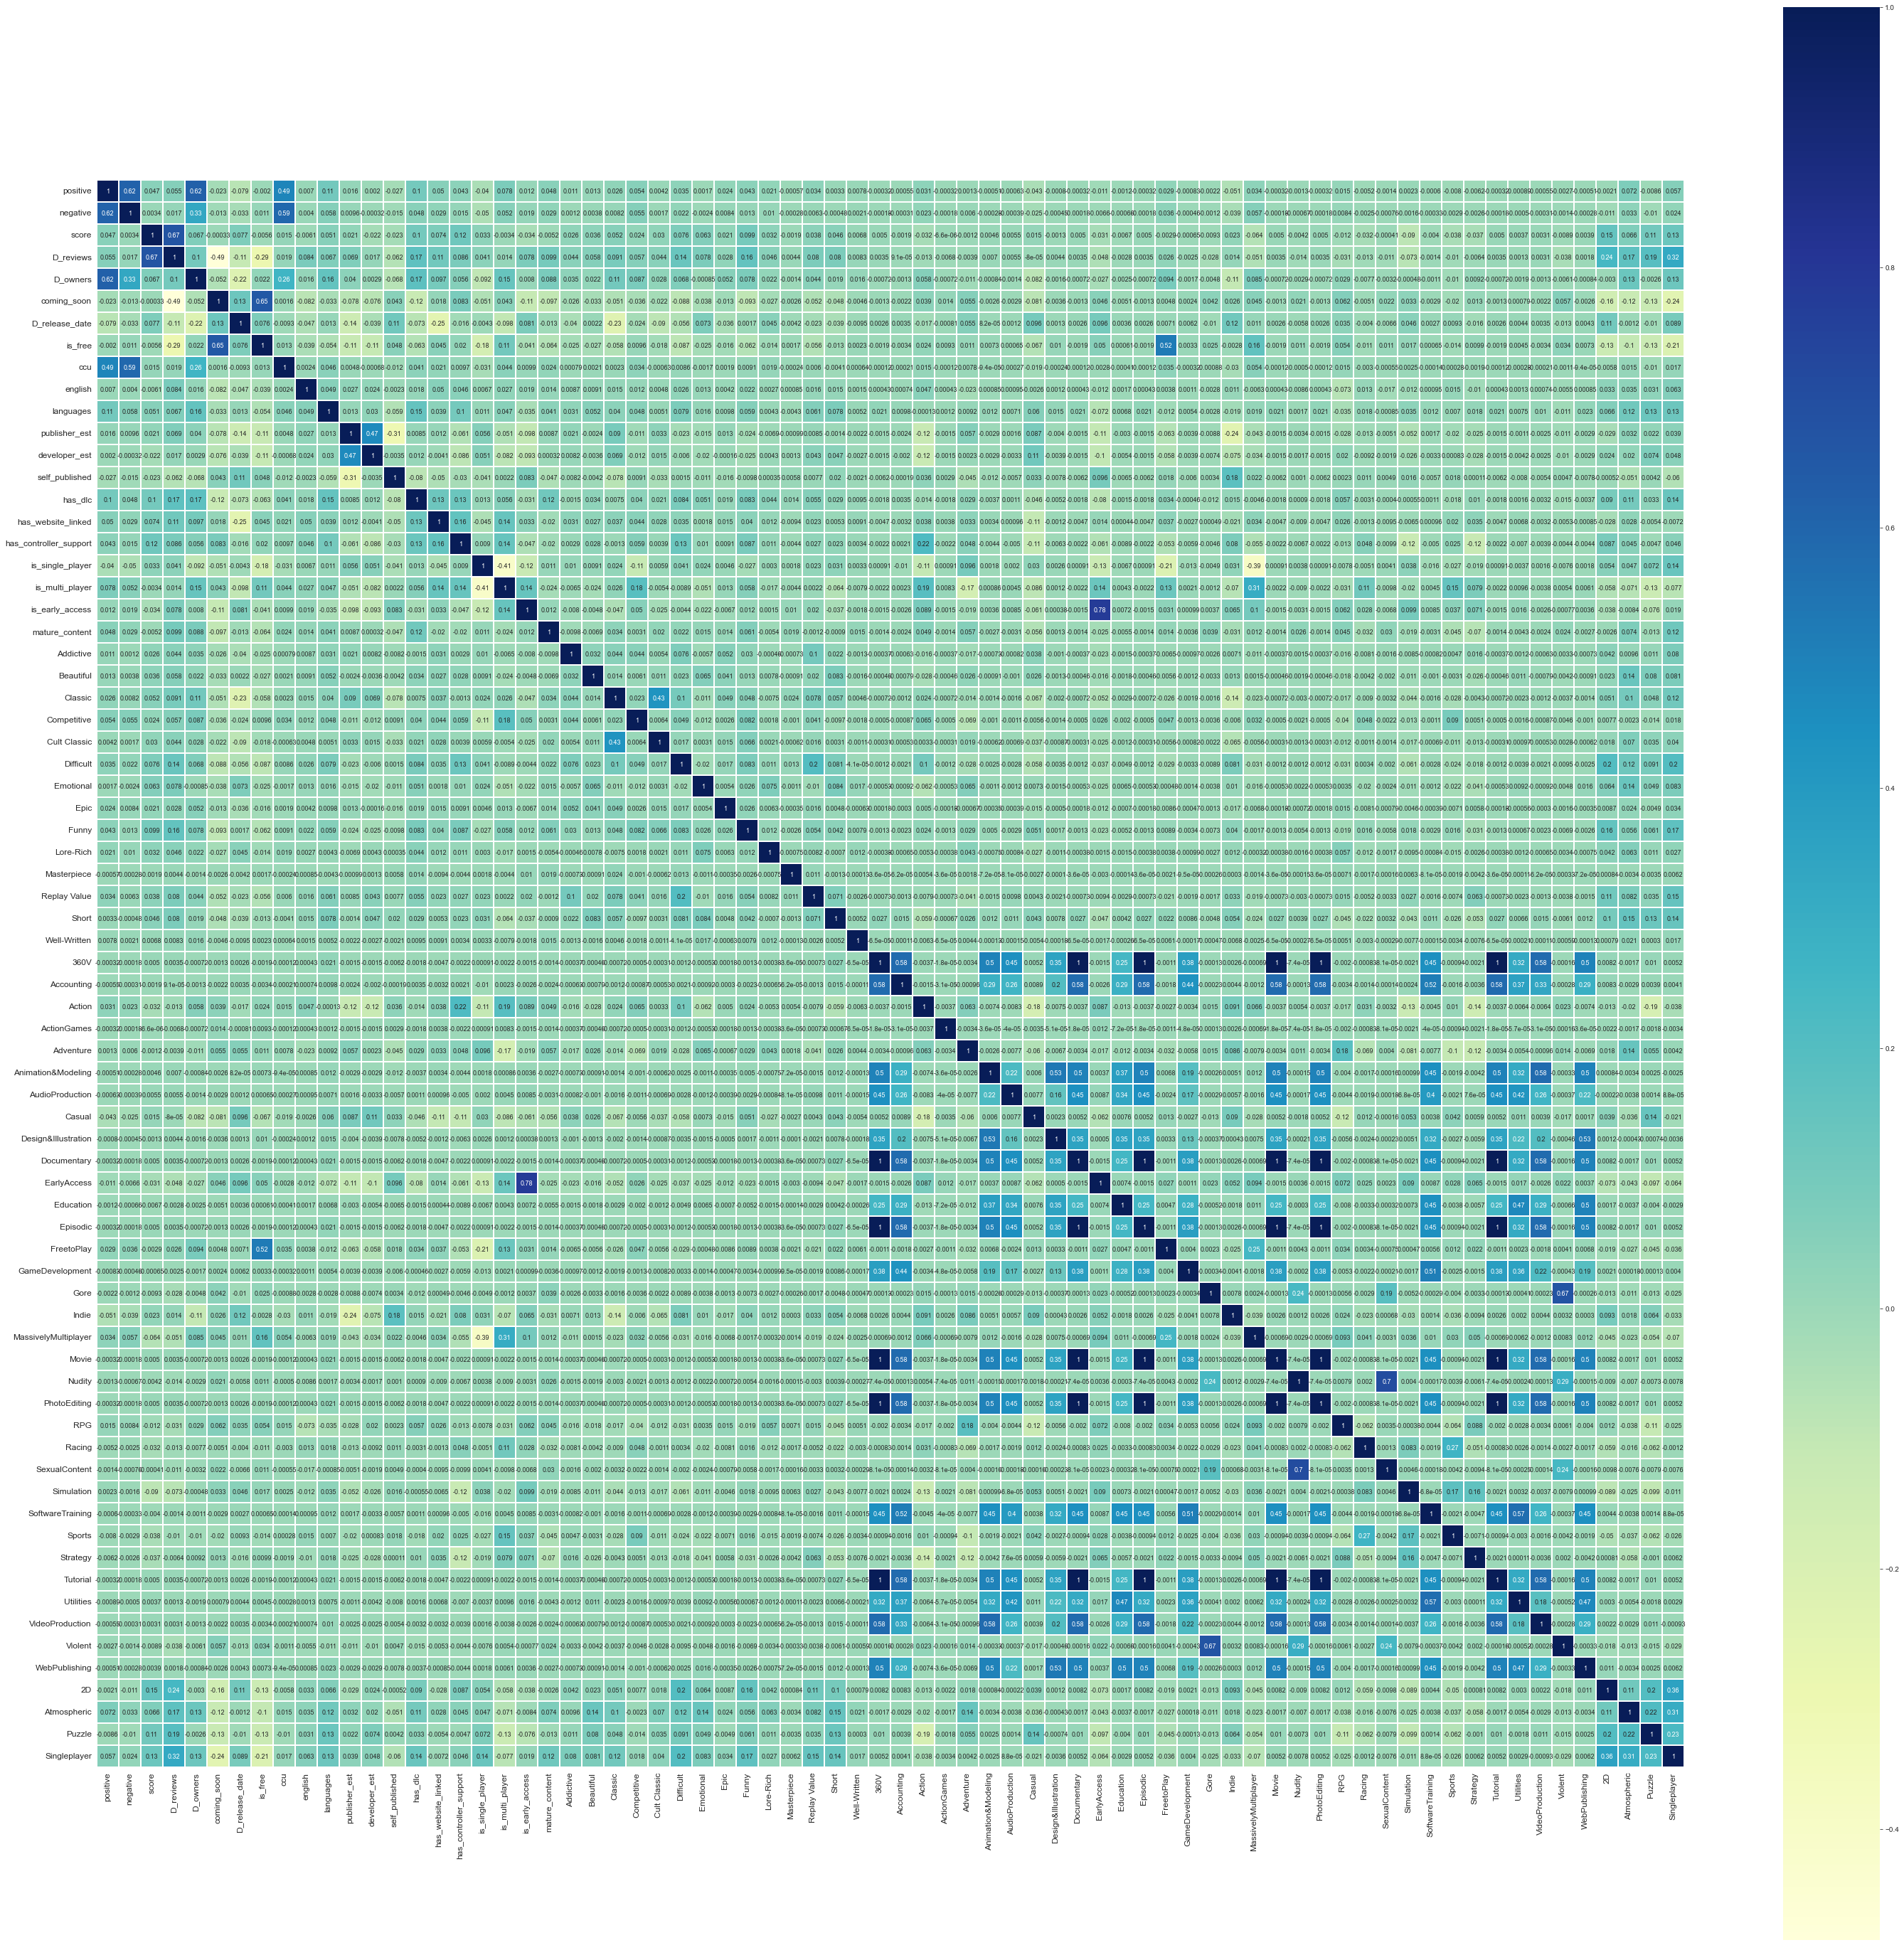

In [982]:
import seaborn as sns
import matplotlib.pyplot as pyplot
df = trained_df
corr_matrix = df.corr()

# sns.heatmap(corr_matrix, annot=True, xticklabels=True, yticklabels=True)
pyplot.figure(figsize=(50,50))

g=sns.heatmap(df.corr(), vmin=df.corr().values.min(),
              vmax=1, square=True, cmap="YlGnBu", linewidths=0.1,
              annot=True, annot_kws={"fontsize":9},
              xticklabels=1, yticklabels=1)

g.set_xticklabels(g.get_xticklabels(), fontsize = 12)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12)
pyplot.savefig(data_path + 'corr_before.png')

#### 1.7.1 Zavislosti z korelacnej matice
- Uplne vpravo mozme vidiet korelaciu 0.52 pre stlpce FreeToPlay a is_free
- - vzhladom na to ze is_free je stlpec ktory rozhoduje o hodnote ci je hra zadarmo a FreeToPlay je hodnota z tagu - tak odstranime stlpec FreeToPlay
- - rovnake spravanie mozme vidiet pri stlpcoch is_early_access a stlpcu (z tagov) EarlyAccess


- odstranenie stlpcov

In [983]:
# train df
trained_df = trained_df.drop('FreetoPlay', axis=1)
trained_df = trained_df.drop('EarlyAccess', axis=1)
trained_df = trained_df.drop('360V', axis=1)
trained_df = trained_df.drop('Documentary', axis=1)
trained_df = trained_df.drop('Episodic', axis=1)
trained_df = trained_df.drop('Tutorial', axis=1)
trained_df = trained_df.drop('MassivelyMultiplayer', axis=1)
trained_df = trained_df.drop('SexualContent', axis=1)
trained_df = trained_df.drop('Accounting', axis=1)
trained_df = trained_df.drop('VideoProduction', axis=1)
trained_df = trained_df.drop('Movie', axis=1)
trained_df = trained_df.drop('SoftwareTraining', axis=1)
trained_df = trained_df.drop('Animation&Modeling', axis=1)
trained_df = trained_df.drop('Violent', axis=1)
trained_df = trained_df.drop('Utilities', axis=1)
trained_df = trained_df.drop('WebPublishing', axis=1)
trained_df = trained_df.drop('PhotoEditing', axis=1)
trained_df = trained_df.drop('Design&Illustration', axis=1)
trained_df = trained_df.drop('Cult Classic', axis=1)
trained_df = trained_df.drop('Education', axis=1)
trained_df = trained_df.drop('2D', axis=1)
trained_df = trained_df.drop('Atmospheric', axis=1)
trained_df = trained_df.drop('developer_est', axis=1)
trained_df = trained_df.drop('positive', axis=1)
trained_df = trained_df.drop('ccu', axis=1)

trained_df = trained_df.drop('coming_soon', axis=1)
trained_df = trained_df.drop('D_reviews', axis=1)

trained_df = trained_df.drop('is_single_player', axis=1)
trained_df = trained_df.drop('D_owners', axis=1)
trained_df = trained_df.drop('self_published', axis=1)

# test df
test_df = test_df.drop('FreetoPlay', axis=1)
test_df = test_df.drop('EarlyAccess', axis=1)
test_df = test_df.drop('360V', axis=1)
test_df = test_df.drop('Documentary', axis=1)
test_df = test_df.drop('Episodic', axis=1)
test_df = test_df.drop('Tutorial', axis=1)
test_df = test_df.drop('MassivelyMultiplayer', axis=1)
test_df = test_df.drop('SexualContent', axis=1)
test_df = test_df.drop('Accounting', axis=1)
test_df = test_df.drop('VideoProduction', axis=1)
test_df = test_df.drop('Movie', axis=1)
test_df = test_df.drop('SoftwareTraining', axis=1)
test_df = test_df.drop('Animation&Modeling', axis=1)
test_df = test_df.drop('Violent', axis=1)
test_df = test_df.drop('Utilities', axis=1)
test_df = test_df.drop('WebPublishing', axis=1)
test_df = test_df.drop('PhotoEditing', axis=1)
test_df = test_df.drop('Design&Illustration', axis=1)
test_df = test_df.drop('Cult Classic', axis=1)
test_df = test_df.drop('Education', axis=1)
test_df = test_df.drop('2D', axis=1)
test_df = test_df.drop('Atmospheric', axis=1)
test_df = test_df.drop('developer_est', axis=1)
test_df = test_df.drop('positive', axis=1)
test_df = test_df.drop('ccu', axis=1)

test_df = test_df.drop('coming_soon', axis=1)
test_df = test_df.drop('D_reviews', axis=1)

test_df = test_df.drop('is_single_player', axis=1)
test_df = test_df.drop('D_owners', axis=1)
test_df = test_df.drop('self_published', axis=1)

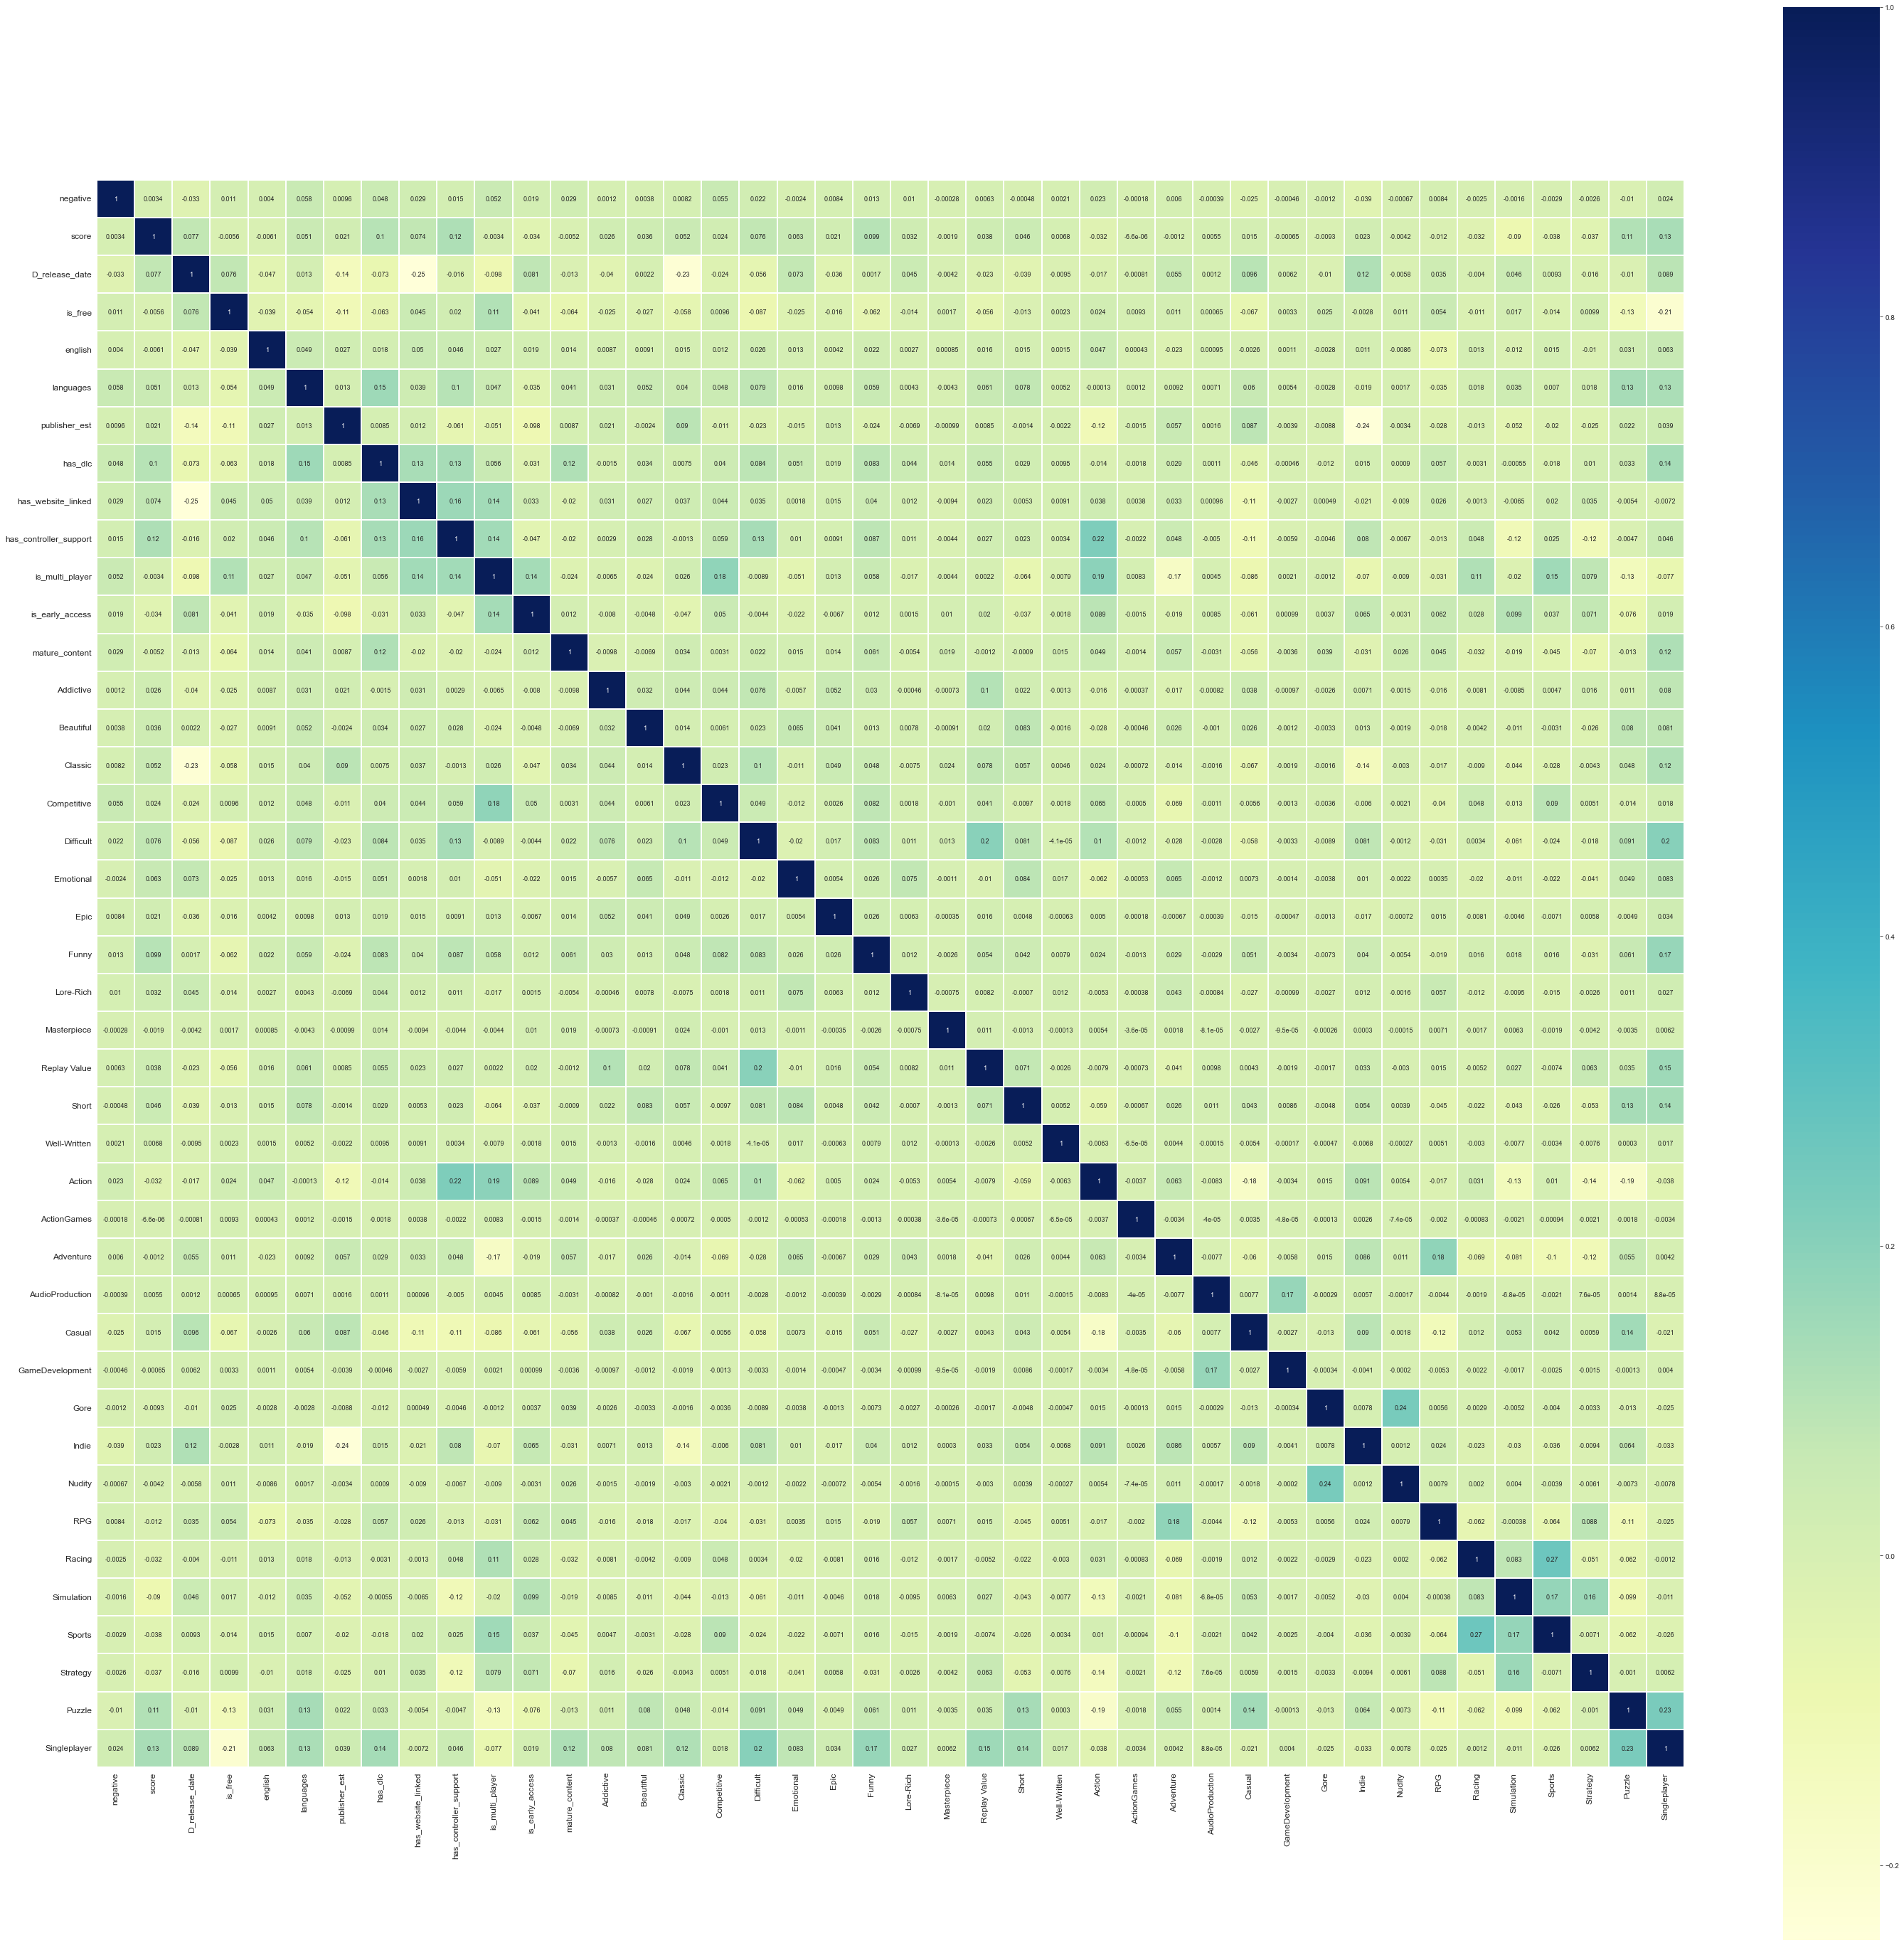

In [984]:
import seaborn as sns
import matplotlib.pyplot as pyplot
df = trained_df
corr_matrix = df.corr()

# sns.heatmap(corr_matrix, annot=True, xticklabels=True, yticklabels=True)
pyplot.figure(figsize=(50,50))

g=sns.heatmap(df.corr(), vmin=df.corr().values.min(),
              vmax=1, square=True, cmap="YlGnBu", linewidths=0.1,
              annot=True, annot_kws={"fontsize":9},
              xticklabels=1, yticklabels=1)

g.set_xticklabels(g.get_xticklabels(), fontsize = 12)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12)
pyplot.savefig(data_path + 'corr_after.png')

#### 1.8 Validacna mnozina

In [985]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(trained_df, test_size=0.15)

#### 1.9 Trenovanie